In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
file_names = {}
file_names['charword'] = "../result_files/word2brain/word2brain_charword_intended_noL2_results"
file_names['word'] = "../result_files/word2brain/word2brain_word_intended_noL2_results"
file_names['glove'] = "../result_files/word2brain/word2brain_glove_intended_noL2_results"
file_names['contextual_01'] = "../result_files/word2brain/word2brain_contextual_01_intended_L2_DropIn8_results"
plot_name = "brain2word_concat_accuracy"

"""
file_names = {}
file_names['charword'] = "../result_files/word2brain_charword_intended_noL2_results"
file_names['word'] = "../result_files/word2brain_word_intended_noL2_results"
file_names['glove'] = "../result_files/word2brain_glove_intended_noL2_results"
file_names['contextual_01'] = "../result_files/word2brain_contextual_01_primary_results"
plot_name = "brain2word_avg_accuracy"
"""

'\nfile_names = {}\nfile_names[\'charword\'] = "../result_files/word2brain_charword_intended_noL2_results"\nfile_names[\'word\'] = "../result_files/word2brain_word_intended_noL2_results"\nfile_names[\'glove\'] = "../result_files/word2brain_glove_intended_noL2_results"\nfile_names[\'contextual_01\'] = "../result_files/word2brain_contextual_01_primary_results"\nplot_name = "brain2word_avg_accuracy"\n'

In [10]:
# Performance Plot

#extract accuracies from the outputs:

tex_plot = {}
for key in file_names.keys():
    file_name = file_names[key]
    with open(file_name,'r') as fin:
        all_lines = fin.readlines()

    c_accs = []
    e_accs = []
    
    epoch = 0
    print(key)
    tex_plot[key] = []
    for i in np.arange(len(all_lines)):
        line = all_lines[i]
        if line.startswith("binary accuracy:"):
            parts = line.split()
            c_accs.append(parts[2])
            e_accs.append(parts[3])
            tex_plot[key].append((int(epoch/2),parts[2]))
            epoch += 1
    test_indexes = np.arange(0,len(c_accs),2)[:40]
    train_indexes = np.arange(1,len(c_accs),2)[:40]
    
    test_c_accs = np.asarray(c_accs)[test_indexes]
    test_e_accs = np.asarray(e_accs)[test_indexes]
    
    train_c_accs = np.asarray(c_accs)[train_indexes]
    train_e_accs = np.asarray(e_accs)[train_indexes]
    tex_plot[key] = np.asarray(tex_plot[key])[test_indexes]
    
    plt.plot(np.arange(len(test_c_accs)),test_c_accs, '-',label=key)
        
    

charword
word
glove
contextual_01


In [11]:
for pair in tex_plot['word']:
    print("(%d,%f)" %(int(pair[0]),float(pair[1])))

(0,0.561209)
(1,0.599939)
(2,0.601359)
(3,0.608375)
(4,0.614823)
(5,0.606386)
(6,0.613905)
(7,0.617162)
(8,0.610452)
(9,0.609053)
(10,0.617446)
(11,0.617599)
(12,0.613228)
(13,0.610342)
(14,0.614692)
(15,0.606933)
(16,0.606955)
(17,0.606190)
(18,0.603829)
(19,0.597097)
(20,0.604463)
(21,0.605403)
(22,0.593928)
(23,0.596267)
(24,0.598103)
(25,0.599633)
(26,0.597950)
(27,0.594453)
(28,0.595043)
(29,0.598759)
(30,0.597185)
(31,0.607895)
(32,0.597884)
(33,0.601141)
(34,0.599786)
(35,0.603960)
(36,0.599239)
(37,0.598147)
(38,0.590672)
(39,0.601250)


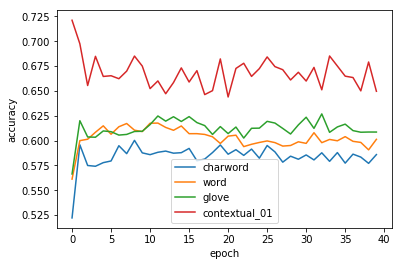

In [12]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(plot_name, bbox_inches='tight')
plt.show()